In [1]:
## Connect to DB server on AWS
import mysql.connector 
import config
cnx = mysql.connector.connect(
    host = config.host,
    user = config.user,
    passwd = config.passwd,
    database = 'crime_nyc'
)
cursor = cnx.cursor()
cnx.database = 'crime_nyc'

In [2]:
import numpy as np
from scipy import stats
from scipy.stats import ttest_ind
import math
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import itertools

In [4]:
query = ("SELECT * FROM crime2019_frec;")
cursor.execute(query)
#cursor.close()
#cnx.close()

In [5]:
result = cursor.fetchall()

In [6]:
df = pd.DataFrame(result)
df.columns = [x[0] for x in cursor.description]
df.replace(np.nan,0,inplace=True)
df

,index,zipcode,borough,mar_arrests,drugs_arrests,total_arrests,robbery_arrests,med_income,neighborhoods
0,0,10001,Manhattan,13.0,148.0,1706.0,22.0,81671.0,Chelsea and Clinton
1,1,10002,Manhattan,19.0,227.0,2342.0,90.0,33218.0,Lower East Side
2,2,10003,Manhattan,8.0,47.0,1306.0,109.0,92540.0,Lower East Side
3,3,10004,Manhattan,0.0,3.0,32.0,1.0,129313.0,Lower Manhattan
4,4,10005,Manhattan,0.0,5.0,53.0,0.0,124670.0,Lower Manhattan
...,...,...,...,...,...,...,...,...,...
182,235,11691,Queens,16.0,60.0,1383.0,65.0,39409.0,Rockaways
183,236,11692,Queens,20.0,67.0,1083.0,20.0,43354.0,Rockaways
184,237,11693,Queens,1.0,3.0,38.0,0.0,50570.0,Rockaways
185,238,11694,Queens,3.0,14.0,183.0,2.0,76944.0,Rockaways


In [7]:
df['med_income'].describe()

count       187.000000
mean      58267.491979
std       32393.407326
min           0.000000
25%       39293.500000
50%       55429.000000
75%       74122.000000
max      216037.000000
Name: med_income, dtype: float64

In [8]:
#overall robbery arrest counts
df['robbery_arrests'].mean()

36.13903743315508

In [9]:
df['income_range'] = np.where(df['med_income']>=70000, 'high med_income','mid or low med_income')
df

,index,zipcode,borough,mar_arrests,drugs_arrests,total_arrests,robbery_arrests,med_income,neighborhoods,income_range
0,0,10001,Manhattan,13.0,148.0,1706.0,22.0,81671.0,Chelsea and Clinton,high med_income
1,1,10002,Manhattan,19.0,227.0,2342.0,90.0,33218.0,Lower East Side,mid or low med_income
2,2,10003,Manhattan,8.0,47.0,1306.0,109.0,92540.0,Lower East Side,high med_income
3,3,10004,Manhattan,0.0,3.0,32.0,1.0,129313.0,Lower Manhattan,high med_income
4,4,10005,Manhattan,0.0,5.0,53.0,0.0,124670.0,Lower Manhattan,high med_income
...,...,...,...,...,...,...,...,...,...,...
182,235,11691,Queens,16.0,60.0,1383.0,65.0,39409.0,Rockaways,mid or low med_income
183,236,11692,Queens,20.0,67.0,1083.0,20.0,43354.0,Rockaways,mid or low med_income
184,237,11693,Queens,1.0,3.0,38.0,0.0,50570.0,Rockaways,mid or low med_income
185,238,11694,Queens,3.0,14.0,183.0,2.0,76944.0,Rockaways,high med_income


In [10]:
df_high_income = df[df['income_range'] == 'high med_income']
df_high_income

,index,zipcode,borough,mar_arrests,drugs_arrests,total_arrests,robbery_arrests,med_income,neighborhoods,income_range
0,0,10001,Manhattan,13.0,148.0,1706.0,22.0,81671.0,Chelsea and Clinton,high med_income
2,2,10003,Manhattan,8.0,47.0,1306.0,109.0,92540.0,Lower East Side,high med_income
3,3,10004,Manhattan,0.0,3.0,32.0,1.0,129313.0,Lower Manhattan,high med_income
4,4,10005,Manhattan,0.0,5.0,53.0,0.0,124670.0,Lower Manhattan,high med_income
5,5,10006,Manhattan,0.0,5.0,108.0,2.0,119274.0,Lower Manhattan,high med_income
6,6,10007,Manhattan,1.0,9.0,254.0,0.0,216037.0,Lower Manhattan,high med_income
8,8,10010,Manhattan,0.0,0.0,0.0,0.0,97955.0,Gramercy Park and Murray Hill,high med_income
9,9,10011,Manhattan,4.0,68.0,1331.0,66.0,104238.0,Chelsea and Clinton,high med_income
10,10,10012,Manhattan,8.0,128.0,717.0,10.0,86594.0,Greenwich Village and Soho,high med_income
11,11,10013,Manhattan,3.0,16.0,907.0,26.0,83725.0,Greenwich Village and Soho,high med_income


In [11]:
#high med_income robbery arrest counts
df_high_income['robbery_arrests'].mean()


15.0

In [12]:
from pydoc import help
from scipy.stats.stats import pearsonr
import seaborn as sn

In [13]:
df_corr = df.filter(['mar_arrests','drugs_arrests','total_arrests','robbery_arrests','med_income'])
df_corr

,mar_arrests,drugs_arrests,total_arrests,robbery_arrests,med_income
0,13.0,148.0,1706.0,22.0,81671.0
1,19.0,227.0,2342.0,90.0,33218.0
2,8.0,47.0,1306.0,109.0,92540.0
3,0.0,3.0,32.0,1.0,129313.0
4,0.0,5.0,53.0,0.0,124670.0
...,...,...,...,...,...
182,16.0,60.0,1383.0,65.0,39409.0
183,20.0,67.0,1083.0,20.0,43354.0
184,1.0,3.0,38.0,0.0,50570.0
185,3.0,14.0,183.0,2.0,76944.0


In [14]:
pearsoncorr = df_corr.corr(method='pearson')
pearsoncorr

,mar_arrests,drugs_arrests,total_arrests,robbery_arrests,med_income
mar_arrests,1.000000,0.665176,0.733863,0.573712,-0.357684
drugs_arrests,0.665176,1.000000,0.837240,0.627376,-0.333473
total_arrests,0.733863,0.837240,1.000000,0.832388,-0.330721
robbery_arrests,0.573712,0.627376,0.832388,1.000000,-0.290050
med_income,-0.357684,-0.333473,-0.330721,-0.290050,1.000000


In [15]:
# conda install -c conda-forge matplotlib=3.1.2


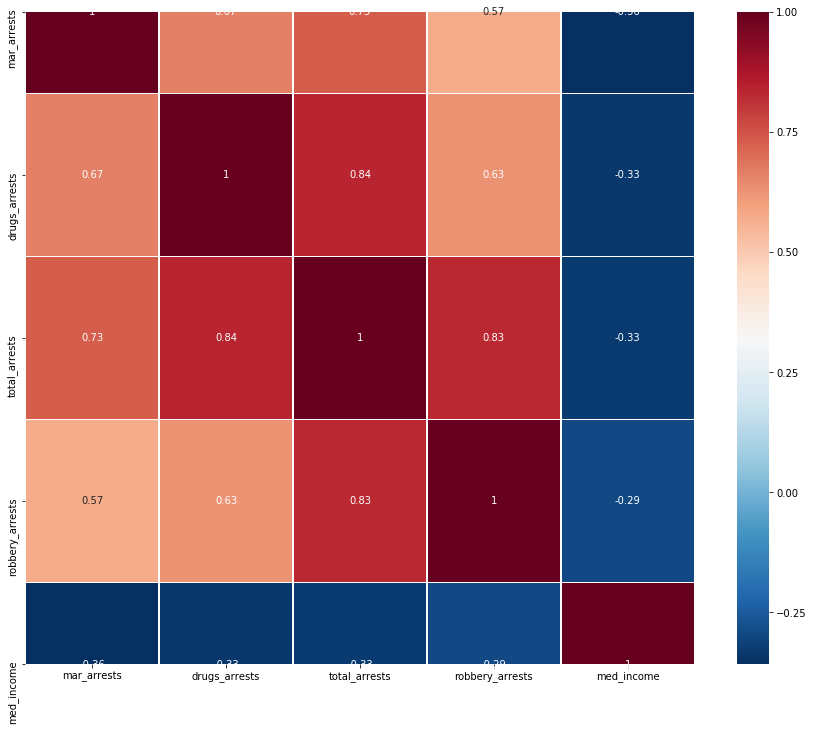

In [16]:
plt.subplots(figsize=(15,12))
sn.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5,
            )

In [17]:
from matplotlib import pyplot
x = list(df['med_income'])
y = list(df['robbery_arrests'])
size = list(df['robbery_arrests'])

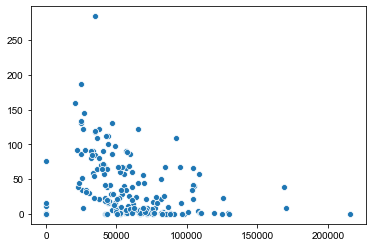

In [18]:
g = sns.scatterplot(x=x,y=y)
g

sns.set(rc={'figure.figsize':(17,10)})



Text(0.5, 1.0, 'Income vs. Robbery Arrest')

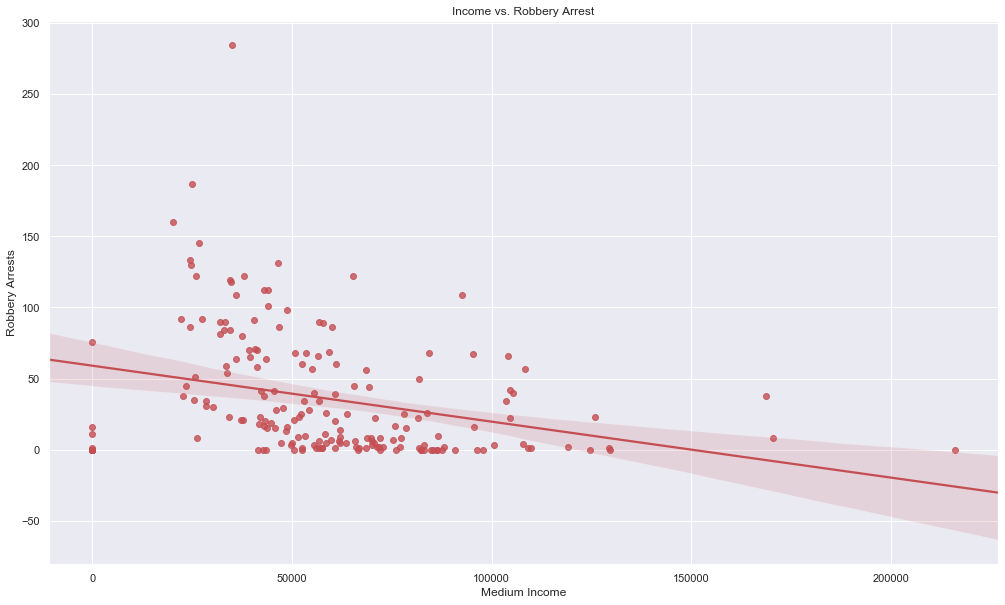

In [19]:
sns.regplot(x,y,fit_reg=True,color='r',marker='o')
plt.xlabel('Medium Income')
plt.ylabel('Robbery Arrests')
plt.title('Income vs. Robbery Arrest')


In [20]:
import seaborn as sns


In [21]:
# Pearson's correlation coefficient = covariance(X, Y) / (stdv(X) * stdv(Y))

# calculate the Pearson's correlation between two variables

from scipy.stats import pearsonr

# calculate Pearson's correlation
corr, _ = pearsonr(x, y)
print('Pearsons correlation: %.3f' % corr)

#Pearsons correlation: -0.290


Pearsons correlation: -0.290


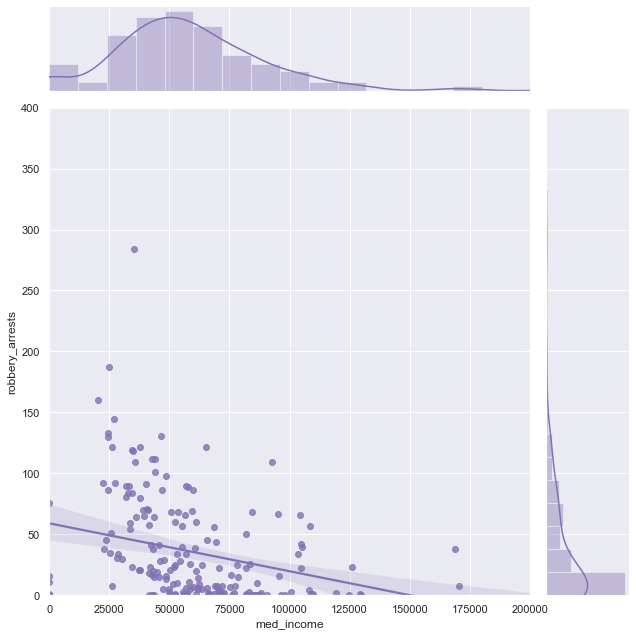

In [22]:
sns.set(style="darkgrid")

g = sns.jointplot("med_income", "robbery_arrests", data=df, kind="reg",
                  xlim=(0, 200000), ylim=(0, 400), color="m", height=9)

# Hypothesis Testing

In [23]:
sample = df_high_income['robbery_arrests']
    
# population mean (mu) (higher)
mu = 36.13903743315508

# Sample mean (x̄) using NumPy mean()
x_bar = sample.mean()

# Sample Stadrad Deviation (sigma) using Numpy
sigma = np.std(sample,ddof=1)

# Sample size (n)
n = len(sample)

# Degrees of Freedom
df = n-1

# Difference in sample mean 
diff = x_bar - mu

# Print the findings
print ('The sample contains', n, 'observations, having a mean of', x_bar, "and a standard deviation (sigma) = ", sigma, 
       ", with", df, 'degrees of freedom. The difference between sample and population means is:', diff)

The sample contains 56 observations, having a mean of 15.0 and a standard deviation (sigma) =  22.957668554418703 , with 55 degrees of freedom. The difference between sample and population means is: -21.13903743315508


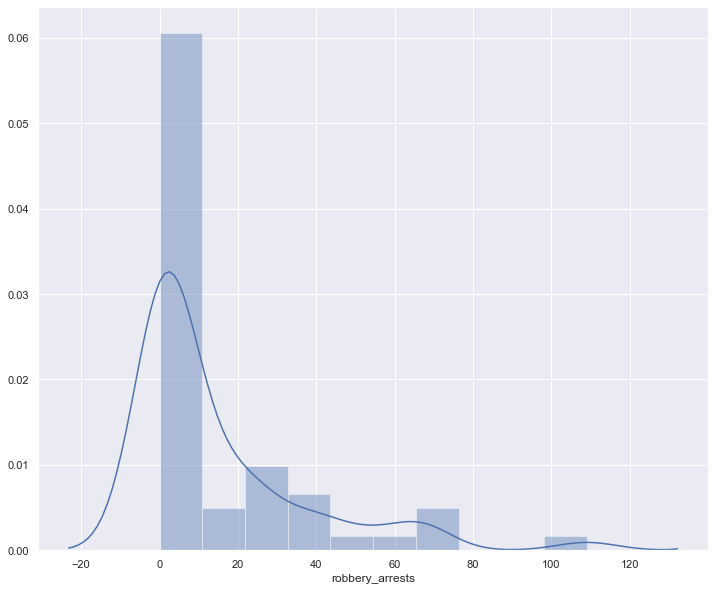

In [24]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(12,10)})
sns.distplot(sample)


In [25]:
# hypothesis
#H0: medium income has no relationship on #of robberies. mu = 36.14
#H1: higher med income lowers robberies rate. mu < 36.14



In [26]:
# Calculate Sigma
t = (x_bar -  mu)/(sigma/np.sqrt(n))
t

-6.890511148688224

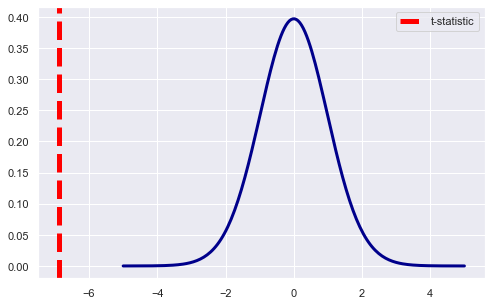

In [27]:
# generate points on the x axis between -5 and 5:
xs = np.linspace(-5, 5, 200)

# use stats.t.pdf to get values on the probability density function for the t-distribution
# the second argument is the degrees of freedom
ys = stats.t.pdf(xs, df, 0, 1)

# initialize a matplotlib "figure"
fig = plt.figure(figsize=(8,5))

# get the current "axis" out of the figure
ax = fig.gca()

# plot the lines using matplotlib's plot function:
ax.plot(xs, ys, linewidth=3, color='darkblue')

# plot a vertical line for our measured difference in rates t-statistic
ax.axvline(t, color='red', linestyle='--', lw=5,label='t-statistic')
ax.legend()
plt.show()

In [28]:
# n the case of a one-sided alternative, A negative T-statistic implies that the sample mean (x bar = 15) is less than the hypothesized mean (36.14). 
# This would be evidence against the null hypothesis

# Calculate critical t-value (find rejection region) (alpha = 0.05)
# calculate t critical using: scipy.stats.t.ppf(1-alpha, df)
# for H0 to be true, t_crit means most values would fall under 1.682
t_crit = np.round(stats.t.ppf(1 - 0.05, df=df),3)
t_crit


1.673

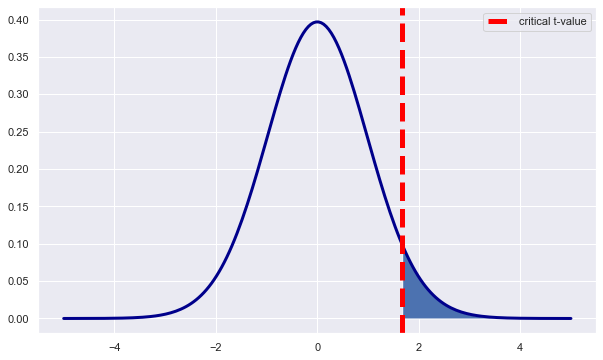

In [29]:
# generate points on the x axis between -5 and 5:
xs = np.linspace(-5, 5, 200)

# use stats.t.pdf to get values on the probability density function for the t-distribution
# the second argument is the degrees of freedom
ys = stats.t.pdf(xs, df, 0, 1)

# initialize a matplotlib "figure"
fig = plt.figure(figsize=(10,6))

# get the current "axis" out of the figure
ax = fig.gca()

# plot the lines using matplotlib's plot function:
ax.plot(xs, ys, linewidth=3, color='darkblue')


ax.axvline(t_crit,color='red',linestyle='--',lw=5,label='critical t-value')
ax.legend()
ax.fill_betweenx(ys,xs,t_crit,where= xs > t_crit)
plt.show()

In [30]:
results = stats.ttest_1samp(a= sample, popmean= mu)         
print ("The t-value for sample is", round(results[0], 2), "and the p-value is", np.round((results[1]), 4))
#  Print results
# The t-value for sample is -6.89 and the p-value is 0.0

The t-value for sample is -6.89 and the p-value is 0.0
